# 로지스틱 회귀
- 종속 변수가 범주형인 경우 적용하는 회귀 분석 방식
- 종속 변수 Y를 직접 모델링하지 않고, Y가 특정 범주에 속하는 확률을 모델링

- 매개변수
    - <span style="color:#ffd33d">**penalty**</span>
        </br>: 규제 방식 선택
        - 기본값: 'l2'
            - l1 : Lasso
            - l2 : Ridge
            - elasticnet : l1 + l2 혼합
            - none : 규제 없음
    - <span style="color:#ffd33d">**solver**</span>
        </br>: 데이터의 크기나 규제에 따라 최적의 알고리즘 선택
        - 기본값: lbfgs
            - liblinear : 적은 데이터 / L1, L2 지원
            - lbfgs : 다중 클래스 지원, 빠르며 안정적 / L2, None 지원
            - saga : 대규모 데이터 / L1, L2, ElasticNet 지원
            - newton-cg, sag : 대규모 데이터 / L2, None 지원
    - <span style="color:#ffd33d">**dual**</span>
        </br>: 쌍대 문제를 생성하여 해답을 내는 과정을 사용할 것인가?
        - solver 매개변수의 값이 'liblinear'인 경우 사용
        - 데이터의 개수가 적은 경우 사용
        - 기본값: False
    - <span style="color:#ffd33d">**C**</span>
        </br>: 훈련 데이터를 얼마나 엄격하게 따라야 하는지
        - 규제 강도(alpha)의 역수
        - 작을수록 규제 강도 ↑ (과적합 방지)
        </br> 클수록 규제 강도 ↓ (유연)
        - 기본값: 1.0
    - <span style="color:#ffd33d">**class_weight**</span>
        </br>: 클래스의 불균형 처리
        - dict형 데이터는 { 클래스명 : 가중치, ... } 형식으로 특정 클래스에 가중치 선택 지정
        - 기본값: None
            - 'balanced' : 클래스의 빈도에 반비례하게 가중치 부여
    - <span style="color:#ffd33d">**multi_class**</span>
        </br>: 다중 클래스의 처리 방식 지정
        - 기본값: auto
            - ovr<span style="color:#808080">(One vs Rest)</span> : 2진 분류를 반복
            - multinomial : Softmax 기반, solver 제한
            - auto : solver와 데이터의 크기를 기반으로 자동 지정
    - <span style="color:#ffd33d">**l1_ratio**</span>
        </br>: 규제 방식이 ElasticNet인 경우 L1 페널티의 비중 (0과 1 사이의 값)
        - 기본값: None

- 속성 (fit( ) 함수를 이용하여 학습한 뒤 생성되는 데이터)
    - <span style="color:#ffd33d">**coef_**</span>
    </br>: 추정된 회귀계수를 출력
    - <span style="color:#ffd33d">**intercept_**</span>
    </br>: 절편의 값 
    - <span style="color:#ffd33d">**classes_**</span>
    </br>: 학습된 클래스

- 메소드 (class 안의 함수들)
    - <span style="color:#ffd33d">**fit(x, y)**</span>
    </br>: 모델의 학습 
    - <span style="color:#ffd33d">**predict(x)**</span>
    </br>: 클래스를 예측
    - <span style="color:#ffd33d">**predict_proba(x)**</span>
    </br>: 클래스별 예측 확률
    - <span style="color:#ffd33d">**predict_log_proba(x)**</span>
    </br>: 클래스별 로그 확률
    - <span style="color:#ffd33d">**decision_function(x)**</span>
    </br>: 클래스별 점수
    - <span style="color:#ffd33d">**score(x, y)**</span>
    </br>: 정확도 평가
    - <span style="color:#ffd33d">**get_params( )**</span>
    </br>: 모델 생성 시 하이퍼 파라미터의 인자값

In [40]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

# 분류 모델의 평가 지표
from sklearn.metrics import \
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
    # 정확도, 정밀도, 재현율, F1 Score, 혼동 행렬

import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# 경고 메시지를 무시하는 라이브러리 (오류 메시지 아님)
import warnings

# 경고 메시지 출력을 필터링
warnings.filterwarnings('ignore')

In [16]:
body = pd.read_csv('../data/bodyPerformance.csv')
body.head()

,age,gender,height_cm,weight_kg,body fat_%,diastolic,systolic,gripForce,sit and bend forward_cm,sit-ups counts,broad jump_cm,class
0,27.0,M,172.3,75.24,21.3,80.0,130.0,54.9,18.4,60.0,217.0,C
1,25.0,M,165.0,55.80,15.7,77.0,126.0,36.4,16.3,53.0,229.0,A
2,31.0,M,179.6,78.00,20.1,92.0,152.0,44.8,12.0,49.0,181.0,C
3,32.0,M,174.5,71.10,18.4,76.0,147.0,41.4,15.2,53.0,219.0,B
4,28.0,M,173.8,67.70,17.1,70.0,127.0,43.5,27.1,45.0,217.0,B


In [17]:
body.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13393 entries, 0 to 13392
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      13393 non-null  float64
 1   gender                   13393 non-null  object 
 2   height_cm                13393 non-null  float64
 3   weight_kg                13393 non-null  float64
 4   body fat_%               13393 non-null  float64
 5   diastolic                13393 non-null  float64
 6   systolic                 13393 non-null  float64
 7   gripForce                13393 non-null  float64
 8   sit and bend forward_cm  13393 non-null  float64
 9   sit-ups counts           13393 non-null  float64
 10  broad jump_cm            13393 non-null  float64
 11  class                    13393 non-null  object 
dtypes: float64(10), object(2)
memory usage: 1.2+ MB


In [18]:
# gender 컬럼의 데이터의 유일한 값 출력
body['gender'].unique()

array(['M', 'F'], dtype=object)

In [19]:
# 빈도수 확인
body['gender'].value_counts()

gender
M    8467
F    4926
Name: count, dtype: int64

In [20]:
# gender 컬럼의 데이터를 M은 0으로, F는 1로 변환
# 방법 1
body['gender'].map(
    lambda x: 0 if x == 'M' else 1
).value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [21]:
# 방법 2
body['gender'].map(
    {
        'M': 0,
        'F': 1
    }
).value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [22]:
# 방법 3
body['gender'].replace('M', 0).replace('F', 1).value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [23]:
# 방법 4
body['gender'] = np.where(
    body['gender'] == 'M', 0, 1
)

body['gender'].value_counts()

gender
0    8467
1    4926
Name: count, dtype: int64

In [24]:
# class 컬럼의 데이터를 이진 분류
# A는 1 나머지는 0으로
body['class_1'] = np.where(
    body['class'] == 'A', 1, 0
)

In [25]:
body['class_1'].value_counts()

class_1
0    10045
1     3348
Name: count, dtype: int64

In [26]:
# 독립 변수, 종속 변수 나눠주기
x = body.drop(['class', 'class_1'], axis=1).values
y = body['class_1'].values

In [27]:
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.3, random_state= 42
)

In [28]:
print(X_train.shape, X_test.shape)

(9375, 11) (4018, 11)


In [29]:
# 로지스틱 회귀 모델 생성
logR = LogisticRegression()

In [30]:
# 모델 학습
logR.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [31]:
# 확률 추정 그래프 시각화
proba = pd.DataFrame(logR.predict_proba(X_train))

In [32]:
# 클래스의 점수 (분류에 대한 확신의 점수)
cs = pd.DataFrame(logR.decision_function(X_train))

In [33]:
df = pd.concat( [proba, cs], axis= 1 )
# 컬럼의 이름을 변경
df.columns = [ 'Not A', 'A', 'decision_function' ]

df.sort_values('decision_function', inplace= True)
df.reset_index(drop= True, inplace= True)

df

# decision_function 값이 클수록 ~~~~

,Not A,A,decision_function
0,9.999999e-01,7.328947e-08,-16.428849
1,9.999999e-01,1.117553e-07,-16.006954
2,9.999996e-01,3.936170e-07,-14.747887
3,9.999994e-01,5.985917e-07,-14.328685
4,9.999994e-01,6.365679e-07,-14.267174
...,...,...,...
9370,3.896392e-03,9.961036e-01,5.543800
9371,3.501033e-03,9.964990e-01,5.651190
9372,3.462746e-03,9.965373e-01,5.662225
9373,1.263184e-03,9.987368e-01,6.672855


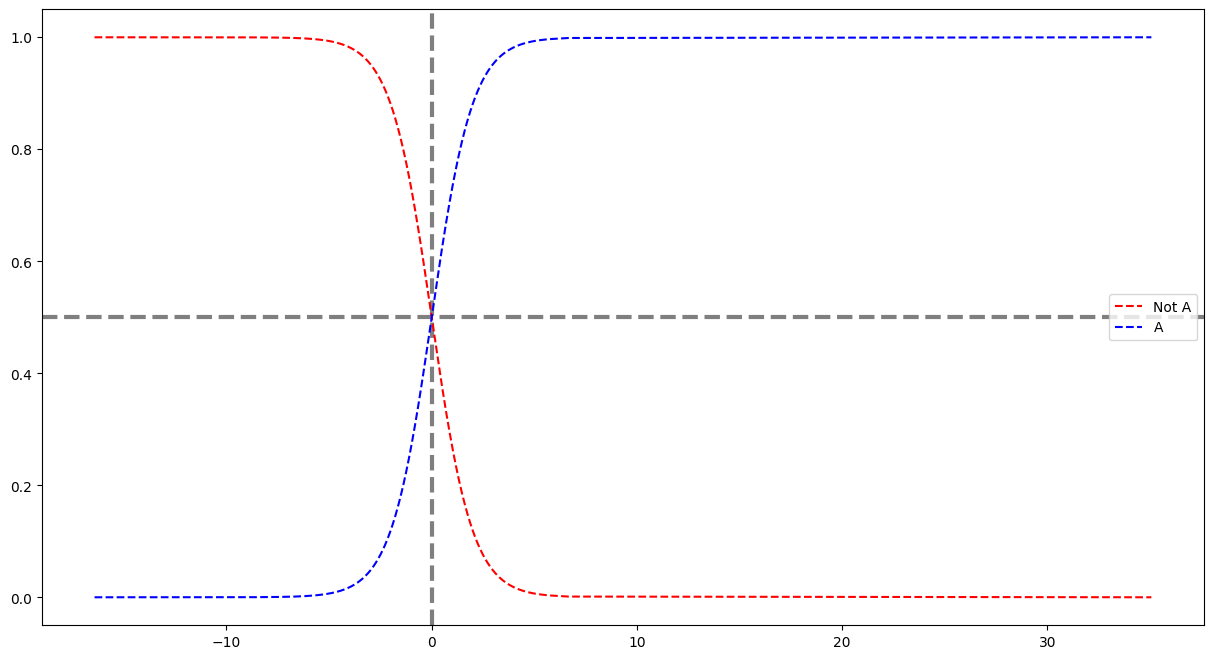

In [34]:
# 그래프 시각화
plt.figure(figsize=(15, 8))

# 각각 y, x축의 보조선
plt.axhline( y=0.5, linestyle = '--', color = 'black', linewidth=3, alpha=0.5 )
plt.axvline( x=0, linestyle = '--', color = 'black', linewidth=3, alpha=0.5 )

plt.plot(df['decision_function'], df['Not A'], 'r--', label='Not A')
plt.plot(df['decision_function'], df['A'], 'b--', label='A')

plt.legend()

plt.show()

# decision_function에 따른 %의 분포
# 0을 지나가는 순간
# Not A 확률 100% -> 0%
# A 확률 0% -> 100%

---

## 분류 분석의 평가 지표

- 정확도
    - 실제 데이터와 예측 데이터가 얼마나 같은지 판단하는 지표
    - ( TN + TP ) / ( TN + TP + FP + FN )
- 혼동행렬
    - 이진 분류의 예측 오류가 얼마인지, 어떤 유형의 오류가 발생하는지를 나타내는 지표
        - TN : 예측값이 Negative(0), 실젯값이 Negative(0)
        - FP : 예측값이 Positive(1), 실젯값이 Negative(0)
        - FN : 예측값이 Negative(0), 실젯값이 Positive(1)
        - TP : 예측값이 Positive(1), 실젯값이 Positive(1)
- 정밀도 (양성 예측도)
    - Positive로 예측한 것들 중 실제로 Positive인 것들의 비율
    - 실제 Negative인 데이터를 Positive로 잘못 예측했을 때 큰 문제가 발생하는 경우에 중요하다.
    - TP / ( TP + FP )
- 재현율
    - 실제 Positive인 것들 중 예측이 Positive인 것들의 비율
    - TP / ( TP + FN )
- F1 Score
    - 정밀도와 재현율을 결합한 분류 성능 지표
    - 정밀도와 재현율이 어느 한 쪽으로 치우치지 않고 적절하게 조화를 이루었을 때 수치가 높아짐

    - 일반적으로는 정밀도와 재현율이 계산된 상태에서 첫 번째 공식을 사용하고, 혼동행렬의 값들만 있을 때는 두 번째 공식을 바로 사용하는 경우가 많습니다.
    - ( 2 * 정밀도 * 재현율 ) / ( 정밀도 + 재현율 )
    - ( 2 * TP ) / ( 2 * TP + FP + FN )


In [35]:
# 분석 모델의 예측
pred = logR.predict(X_test)

In [41]:
# 혼동행렬
cm = confusion_matrix(Y_test, pred)
# 정확도
acc = accuracy_score(Y_test, pred)
# 정밀도
prc = precision_score(Y_test, pred)
# 재현율
rcll = recall_score(Y_test, pred)
# F1 Score
f1 = f1_score(Y_test, pred)

---
0929

In [37]:
# body 데이터프레임의 class 컬럼의 데이터를
# A → 0, B → 1, C → 2, D → 3 으로 변경하여 새로운 컬럼(class_2)에 대입
# np.where( 조건식, 참인 경우의 데이터, 거짓인 경우의 데이터 )
np.where(body['class'] == 'A', 0,
         np.where(body['class'] == 'B', 1,
                  np.where(body['class'] == 'C', 2, 3)
                  )
        )

array([2, 0, 2, ..., 0, 3, 2], shape=(13393,))

In [38]:
# 또는
# map() 함수
body['class'].map(
    {
        'A' : 0,
        'B' : 1,
        'C' : 2,
        'D' : 3
    }
)

0        2
1        0
2        2
3        1
4        1
        ..
13388    2
13389    3
13390    0
13391    3
13392    2
Name: class, Length: 13393, dtype: int64

In [42]:
# 이렇게 쓰는 경우는 많지 않음
body['class_2'] = body['class'].map(
    lambda x: 0 if x == 'A' else 1 if x == 'B' else 2 if x == 'C' else 3
)

In [43]:
body['class_2'].value_counts()

class_2
2    3349
3    3349
0    3348
1    3347
Name: count, dtype: int64

In [44]:
# 독립 변수, 종속 변수 데이터 생성
x = body.drop( ['class', 'class_1', 'class_2'], axis= 1 ).values
y = body['class_2'].values

In [45]:
# 데이터셋을 train, test 데이터로 분할 (y의 데이터의 비율을 그대로 분할)
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y,
    test_size= 0.3,
    random_state= 42,
    stratify= y
)

In [46]:
pd.Series(Y_train).value_counts()

2    2344
3    2344
0    2344
1    2343
Name: count, dtype: int64

In [50]:
# 로지스틱 회귀 모델 생성
# multi class : 다중 클래스
# 다중 클래스를 지원 -> ovr(이진분류 반복 사용), multinomial(다중 클래스 계산)
softm = LogisticRegression( multi_class= 'multinomial', C= 10 )

In [51]:
# 데이터 학습
softm.fit(X_train, Y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,10
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'multinomial'


In [53]:
# 예측
pred = softm.predict(X_test)
pred

array([2, 1, 1, ..., 0, 0, 0], shape=(4018,))

In [ ]:
# 성능 평가 -> sklearn 안의 metrics에 존재
#   -> 해당 함수들은 공통적으로 2개의 인자(실제 데이터, 예측 데이터)를 가짐
multi_cm = confusion_matrix(Y_test, pred)
multi_cm

# 대각선 데이터: 예측 성공 횟수 (ex. A를 A라고 판단)
# 나머지 데이터: 예측 실패 횟수 (ex. A를 B라고 판단)

array([[737, 239,  28,   0],
       [263, 410, 289,  42],
       [116, 192, 500, 197],
       [ 24,  47, 167, 767]])

In [ ]:
multi_acc = accuracy_score(Y_test, pred)
multi_acc
# 정확도 약 60%

0.6007964161274266

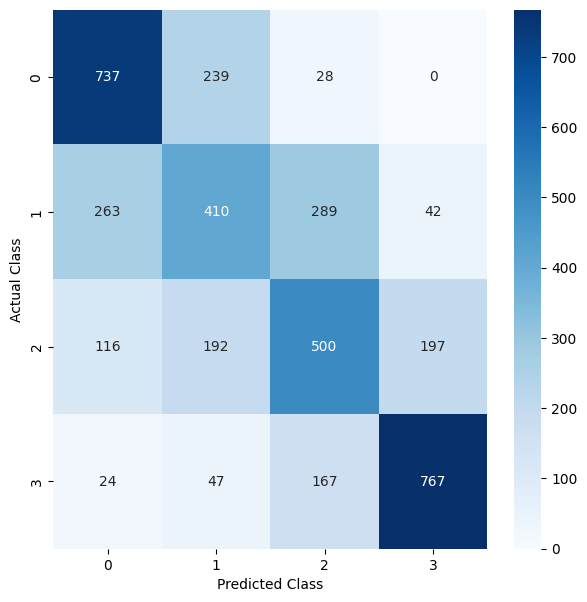

In [59]:
# 혼동행렬 시각화
plt.figure(figsize= (7,7))

sns.heatmap(
    multi_cm,
    annot= True,
    fmt= 'd',
    cmap= 'Blues',
    xticklabels= [0,1,2,3],
    yticklabels= [0,1,2,3]
)

plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')

plt.show()

In [61]:
# ovr 방식으로 다중 클래스를 분류
logR2 = LogisticRegression(multi_class= 'ovr', C= 10)
logR2.fit(X_train, Y_train)
pred2 = logR2.predict(X_test)
acc2 = accuracy_score(Y_test, pred2)
print(round(acc2, 2))
# 정확도 약 58%

0.58
